# BLU04 - Time Series Concepts: Exercise notebook

Yay! Exercises! 

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import hashlib # for grading purposes
%matplotlib inline
import utils
from sklearn.impute import KNNImputer

### You're hired

You've been hired as the data scientist for a supermarket chain that wants to start extracting insights from their data. First you'll start with a specific store.

Let's get our data:

In [2]:
store = utils.get_store_data()
store.head()

,date,customers
67528,10/18/2016,1655
55251,02/27/2016,1314
49000,10/28/2015,1784
54244,02/08/2016,417
48311,10/15/2015,1725


## Exercise 1: Index and datetime

#### 1.1) Make the index the datetime of the dates. 

In [3]:
# We expect the solution to be a dataframe

#store['date'] =
#store =
#store =            # Don't forget best practices

# YOUR CODE HERE

store['date'] = pd.to_datetime(store.date, infer_datetime_format=True)


store = store.set_index('date',   
                      drop=True) 

store = store.sort_index()


In [4]:
expected_hash = '24e6fe346ad970255e2da6db24d4721d0a240cbb5a00a58fe731b4ad767d6ab0'
assert hashlib.sha256(str(store.iloc[25].name).encode()).hexdigest() == expected_hash
assert hashlib.sha256(str(store.index.dtype).encode()).hexdigest() == '261738f2e43a1c47a16f043b46deb993943d61f4a2bbe5ef4b03c3fb1af362b5'


# clue: if this assert is failing, and your iloc[25].name is '18/02/2015', 
# then you are missing the "best practices" part. 
# What did we say in the Learning notebook about this? 

## Exercise 2: Time series preprocessing

#### 2.1) Look out for duplicate timestamps (ungraded)

When working with time series, we should make sure we don't have more than one possible value for the same timestamp. How would you check if there are any duplicates?

In [5]:
## UNGRADED CELL
# use this cell to write your code
# how would you look for duplicate timestamps?
# ...
store.duplicated().sum()


957

#### 2.2) Accounting for missing days

Sometimes datasets don't have rows corresponding to all timestamps, as a data scientist you should know if this is the case. Copy `store` to a new variable called `store_complete`, with no gap days. Fill the missing data with nulls.

In [6]:
# copy store to store_complete
store_complete = store.copy()

# change store_complete index so that it contains each of the days in the time range [2013-01-02, 2017-08-15]
# fill missing data with nulls
#store_complete = 

# YOUR CODE HERE
store_complete = store_complete.asfreq('d', fill_value=None)


In [7]:
#### check number of nulls
assert store_complete.isnull().sum()[0] != 0, "You have 0 null values in the dataset! Remember that each missing day should correspond to a null in customers."
assert store_complete.isnull().sum()[0] == 11, "You should have found 11 days with missing data, no more no less."

#### check store_complete dataframe integrity
assert store_complete.shape[0] != 1676, "Did you fill the index with the missing days?"
assert store_complete.shape[0] == 1687, "The number of rows is not the expected."
assert store_complete.shape[1] == 1, "You shouldn't change the number of columns."
assert str(store_complete[store_complete.customers.isnull()].index[6])[:10] == '2016-01-01', "Do you have all the missing days? Is the index is ordered?"

## Exercise 3: Working with timestamps

#### 3.1) Best day in December 2015

What was the best day in terms of customers in December 2015?

In [8]:
# hint: the answer should be a timestamp

#best_day =

# YOUR CODE HERE

best_day = ((store_complete.loc["12/2015"].customers.idxmax()))


In [9]:
expected_hash = '880a9391c251561f4af225dcfc9d982090357054828e1f79e5e99fc44b2242d1'
assert hashlib.sha256(str(best_day).encode()).hexdigest() == expected_hash

print(f"The best day in December 2015 was day {str(best_day)[-11:-9]}. Talk about last minute shoppers!...")

The best day in December 2015 was day 23. Talk about last minute shoppers!...


#### 3.2) Worst monday

Last monday there were only 20 customers, and your boss said he's never seen such a low count of customers on a monday. To check if your boss is correct, can you find the minimum number of customers that we've ever had on a monday?

- _hint #1: you can use the methods at the bottom of this [page](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) directly on the index_  
- _hint #2: when operating directly on the index, you do not need to use `.dt` to use the methods_

In [10]:
#min_customers_monday =

# YOUR CODE HERE

is_monday = store_complete.index.get_level_values(0).day_name() == 'Monday'

min_customers_monday = (store_complete.loc[is_monday].min())


In [11]:
expected_hash = '4a44dc15364204a80fe80e9039455cc1608281820fe2b24f1e5233ade6af1dd5'
assert hashlib.sha256(str(int(min_customers_monday)).encode()).hexdigest() == expected_hash

print(f"Yep! The lowest count we ever had on a monday was {int(min_customers_monday)} customers. Don't tell your boss.")

Yep! The lowest count we ever had on a monday was 10 customers. Don't tell your boss.


## Exercise 4: Time series methods

#### 4.1) Shopping rush

A new pandemic has started, and everyone came to buy soap and isopropyl alcohol. Your boss swears to have never seen such an absolute increase in sales from one day to the next - "Yesterday there were 100 customers, today there were 5000."

To confirm if what your boss is saying is true, can you find the maximum increase in sales from one day to the next?

In [12]:
# hint: the solution expects a float

#max_increase = 

# YOUR CODE HERE


max_increase =  store_complete.customers.diff().max()


In [13]:
expected_hash = 'aa4b0d224e2b4488c6e3c5692347a0e26322d86dcb6bf01ab937e15d76037ee4'
assert hashlib.sha256(str(int(max_increase)).encode()).hexdigest() == expected_hash

#### 4.2) Bad week

After that shopping rush of the last few days, we had a very slow week, with a mean amount of customers per day of 1000. What was the last week we had less than 1000 customers per day (`last_bad_week`)?

In [14]:
# We expect the answer to be a weekly time period (freq='W-SUN'), so answers  
# which are of the form "the first monday of that week" will not pass the grader. 
# hint: by default pandas uses freq='W-SUN'
#mean_weekly_customers = 
#last_bad_week = 

mean_weekly_customers =  store_complete.resample('W-SUN').mean()


last_bad_week =  mean_weekly_customers.customers.idxmin()


In [15]:
expected_hash = '9d46cb8cb3052fab17285fcf2dc16249b9ccb978f113b0718ff44a8553c189bc'
assert hashlib.sha256(str(last_bad_week).encode()).hexdigest() == expected_hash

---

### Congrats!

Your work is proving useful, so your boss has asked to expand your analysis to the whole chain. 

Let's get the new data:

In [16]:
chain = utils.get_stores_data()
chain.head()

,date,store_nbr,customers
43273,07/09/2015,7,1830
18371,02/02/2014,6,2210
32615,12/01/2014,10,1107
62678,07/16/2016,10,1002
58823,05/04/2016,24,2306


In [17]:
print('We now have %0.0f data points. Wooooow!' % len(chain))

We now have 83488 data points. Wooooow!


The thing is, we can't just set the index to be the day, as we now have multiple stores on the same day. 

Looks like we have to go into multi-indexing...

## Exercise 5: Multi-indexing

#### 5.1) make the date into a datetime, and then set the index to be `[date, store_nbr]`

In [18]:
#chain['date'] = 
#chain = 
#chain =

# YOUR CODE HERE
chain['date'] = pd.to_datetime(chain.date, infer_datetime_format=True)
chain = chain.set_index(['date','store_nbr'])
chain = chain.sort_index()

In [19]:
assert hashlib.sha256(str(chain.index.get_level_values(0).dtype).encode()).hexdigest() == \
        '261738f2e43a1c47a16f043b46deb993943d61f4a2bbe5ef4b03c3fb1af362b5', "First level of index should be a datetime!"
assert hashlib.sha256(str(chain.index.get_level_values(0)).encode()).hexdigest() ==  \
        'aff1142eb44c03cc16656f3c3541ade7b5c151abcb4340fb14a058a7fec7e46b', "Is the index sorted? Never forget to sort your time series."
assert hashlib.sha256(str(chain.index.get_level_values(1)).encode()).hexdigest() ==  \
        'd28cc6e9308dd2e399e100566cc5366b0ef79b74d84a5d666d792c4514704bfb', "Check if you selected the correct values for the second level."

#### 5.2) Customers on shop 20, March 2016

What's the maximum daily number of customers, on store 20, on March 2016?

In [20]:
# hint: the answer should be a timestamp

#max_store20 =

# YOUR CODE HERE
idx = pd.IndexSlice

max_store20 = int(chain.loc[idx["03/2016", 20], :].max())


In [21]:
expected_hash = '605e9e90d5370dfd14f2b61f34cbc58c2c9cf5686160cc483a0c5a4b4f421fc9'
assert hashlib.sha256(str(max_store20).encode()).hexdigest() == expected_hash

print(f"Correct! The maximum daily number of customers on March 2016 was {max_store20}.")

Correct! The maximum daily number of customers on March 2016 was 2253.


#### 5.3) how many stores opened in 2015?

In [22]:
# hint: you can assume that no stores closed in 2015.

#nr_stores_2014 =
#nr_stores_2015 = 
#nr_stores_opened_2015 = 

# YOUR CODE HERE
nr_stores_2014 = chain.loc[idx["2014",:],:].index.get_level_values('store_nbr').nunique()

nr_stores_2015 = chain.loc[idx["2015",:],:].index.get_level_values('store_nbr').nunique()

nr_stores_opened_2015 = (nr_stores_2015 - nr_stores_2014)


In [23]:
expected_hash = 'ef2d127de37b942baad06145e54b0c619a1f22327b2ebbcfbec78f5564afe39d'
assert hashlib.sha256(str(nr_stores_opened_2015).encode()).hexdigest() == expected_hash

#### 5.4) Record number of customers

Find the maximum number of customers per day on each store. The result should be a pandas series where the index corresponds to the `store_nbr` and the values to the corresponding maximum number of customers on record.

In [24]:
# max_per_store = 

# YOUR CODE HERE

max_per_store = chain.groupby(level='store_nbr').max()

In [25]:
assert max_per_store.shape[0] == 54, "There should be 54 stores in record_per_store's index."
expected_hash_1 = '9cf876e274c8bbc32e1ad874ee32f4d7c10c9a3f14a77931ea1f27acedad9d09'
expected_hash_2 = 'cfb05fff77b9b26d027b12c345d05bd1d453619318c52e827458b865860f6a85'
assert hashlib.sha256(str(max_per_store.iloc[5, :].values[0]).encode()).hexdigest() == expected_hash_1
assert hashlib.sha256(str(max_per_store.iloc[35, :].values[0]).encode()).hexdigest() == expected_hash_2

print(f"Good job!! Also, the store with the record count of customers in one day was store {max_per_store.idxmax()[0]}, with a total of {max_per_store.max()[0]} customers. Now that's a lot of customers!...")

Good job!! Also, the store with the record count of customers in one day was store 44, with a total of 8359 customers. Now that's a lot of customers!...


## Exercise 6: Time series modelling concepts

#### 6.1) Store 20

You've been asked to make an analysis on store 20. You remember what you learned on time series  at that awesome Academy in 2020. Let's impress your boss!

#### 6.1.1)  Preprocessing

Let's select all data for store 20, and make sure that we have all consecutive days in our time series.

- Using cross sections, select the data for store `20` from `chain`, and store it in **a new dataframe called `store_20`**, with an index corresponding to the dates and a column with the values in `customers`.

- Make sure you have a continuous datetime index, like we did before. Fill the values for any  missing days with nulls.

In [26]:
# store_20 = 

# YOUR CODE HERE
store_20 = chain.xs(20,  # <---- msft
        level='store_nbr',                # <---- which is at index level "Stock"
        drop_level=True).asfreq('d', fill_value=None)


In [27]:
assert store_20.shape != (909, 1), "Did you forget to make the index continuous?"
assert store_20.shape == (915, 1), "There should be 915 timepoints, including nulls, in store_20."
expected_hash = 'db3ce696964d3f1a802772d5133b59c5a54b445241c5efae6a2e6cef5b6dd4e4'
assert hashlib.sha256(str(int(store_20.loc['2015-02-16'][0])).encode()).hexdigest() == expected_hash, "Did you change any values?"
assert store_20.isnull().sum()[0] == 6, "The values for missing days should be filled as nulls."

#### 6.1.2) Seasonality on store 20

Does the total number of customers that go to store 20 have a stronger weekly or bi-weekly seasonality?

ValueError: <Week: weekday=6> is a non-fixed frequency

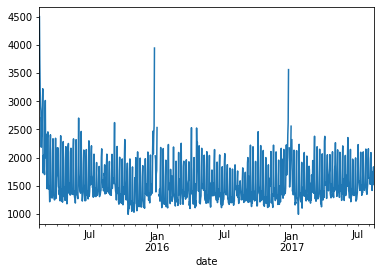

In [30]:
# We expect you to use correlation as a proxy for seasonality.

# hint 1: the order suggested below has a reason. You can think about what would 
# happen if you did it in the opposite order.

# hint2: we expect you to use correlation as a proxy for seasonality. 
# the grader expects you to use the pandas method for correlation

# hint3: use a positive shift

# the 2 variables below should be of type pandas.core.series.Series
#sales_per_day_week_before = 
#sales_per_day_2_weeks_before = 

# the 2 variables below should be floats
#weekly_corr = 
#biweekly_corr = 

# YOUR CODE HERE
store_20.customers.plot()
sales_per_day_week_before = store_20.rolling(7, min_periods=0).customers.sum()
print(sales_per_day_week_before.plot())
sales_per_day_2_weeks_before = store_20.rolling(14, min_periods=0).customers.sum()
#print(sales_per_day_2_weeks_before.loc['2016'])
#weekly_corr = 
#biweekly_corr = 

In [29]:
assert int(sales_per_day_week_before.loc['2016-01-02']) == int(sales_per_day_2_weeks_before.loc['2016-01-09']), "Did you shift the data correctly?"
np.testing.assert_almost_equal(weekly_corr, 0.70, decimal=2, err_msg="Are you using the pandas method for correlation?")
np.testing.assert_almost_equal(biweekly_corr, 0.62, decimal=2, err_msg="Are you using the pandas method for correlation?")

AssertionError: Did you shift the data correctly?

Based on your findings, you conclude the weekly seasonality is stronger than the bi-weekly seasonality on store 20.

#### 6.3) What is the store with the strongest positive trend?

You were very fast and impressed your boss. The problem is: now your boss wants you to dive deeper and analyze all stores data. He wants to know **which store has the strongest positive trend.**

Remember that you have all stores data inside the variable `chain`.

For each store time series you create, don't forget to **fill the missing dates using a `KNNImputer`**.

Not going home earlier after all, are we?

In [ ]:
# This one is a bit harder and there are several ways to solve it. For this reason the
# body of the solution is not presented as in the previous questions. 

# A few clues:
# most solutions are going to require a for loop to run through the various stores
# assume linear trends, where the trend is characterized by the slope of the linear regression
# this is just an EDA, we're not building a predictive model, so you don't need to split your dataset
# remember, the knn should be used per store 

# max_trend_store = 


# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
expected_hash = '0e17daca5f3e175f448bacace3bc0da47d0655a74c8dd0dc497a3afbdad95f1f'
assert hashlib.sha256(str(max_trend_store).encode()).hexdigest() == expected_hash

print("Correct! Your boss is ecstatic about your work and decides to give you a 200% raise!...\nWho cares about going home earlier after all?")

---